 URL: http://www.gavrila.net/Datasets/Daimler_Pedestrian_Benchmark_D/Daimler_Mono_Ped__Detection_Be/daimler_mono_ped__detection_be.html
 
# Instructions

* Download all .tar.gz files, put them in the same folder, extract them all
* Set the basepath variable to the folder where all the .tar.gz files were extracted

Only 2D bbox annotations reading is supported. For 3D you'd have to modify the code a bit.


In [69]:
%load_ext autoreload
%autoreload 2
plt.rcParams['image.cmap'] = 'gray'

import daimler
import os

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:

basepath="/media/data/datasets/pedestrian/daimler_mono/DaimlerBenchmark/"
train_pedestrian,train_non_pedestrian,metadata,object_types=daimler.get_dataset(basepath)
#train_pedestrian is a list of segmented images of pedestrians.
#train_non_pedestrian is a list of images where we are sure that there are NO pedestrians.
#metadata is a list of ImageMetadata objects, that contain the filename and object information (bbox, confidence, etc) of a test image
#object_types is a dictionary that maps object type ids to their string representation (ie,  1:"bicyclist")


Sample metadata for image 2340:
ImageMetadata(filename='02m_45s_663488u.pgm', objects=[ObjectMetadata(id=24, type=1, confidence=0.0, bbox=[466.0, 217.0, 473.0, 238.0]), ObjectMetadata(id=22, type=255, confidence=0.0, bbox=[421.0, 226.0, 424.0, 236.0])])

Non pedestrian images: 6744.

Pedestrian images: 15660.

Sample Image without pedestrians:


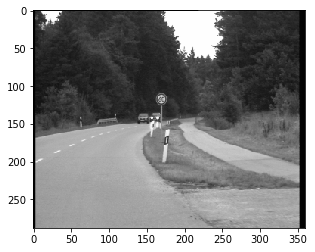


Segmented pedestrian


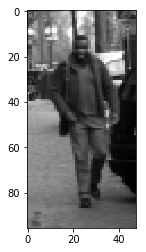

In [70]:
import matplotlib.pyplot as plt

sample_index=2340
print("Sample metadata for image %d:" % sample_index)
print(metadata[sample_index])

print("\nNon pedestrian images: %d." % len(train_non_pedestrian))
print("\nPedestrian images: %d." % len(train_pedestrian))


print("\nSample Image without pedestrians:")
plt.imshow(train_non_pedestrian[3123])
plt.show()

print("\nSegmented pedestrian")
plt.imshow(train_pedestrian[3123])
plt.show()

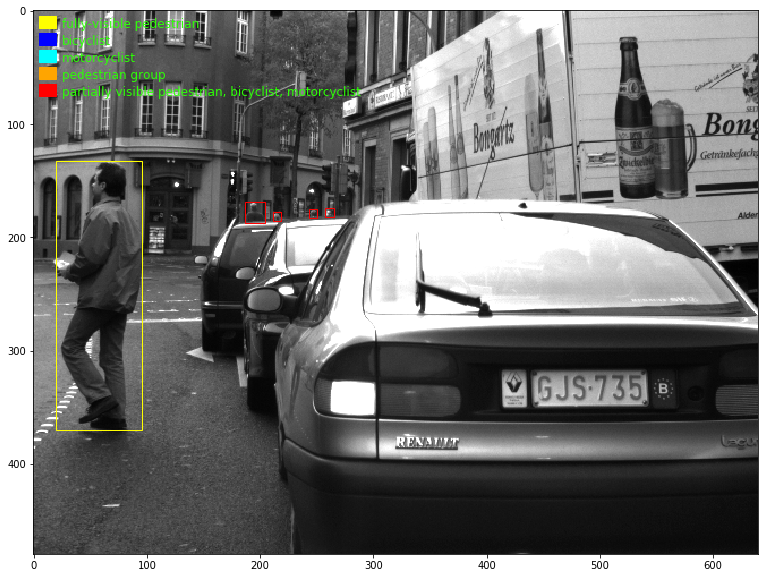

ImageMetadata(filename='08m_09s_595294u.pgm', objects=[ObjectMetadata(id=373, type=255, confidence=0.0, bbox=[187.0, 169.0, 204.0, 187.0]), ObjectMetadata(id=386, type=0, confidence=1.0, bbox=[20.0, 133.0, 96.0, 370.0]), ObjectMetadata(id=376, type=255, confidence=0.0, bbox=[211.0, 178.0, 218.0, 186.0]), ObjectMetadata(id=375, type=255, confidence=0.0, bbox=[243.0, 175.0, 250.0, 183.0]), ObjectMetadata(id=378, type=255, confidence=0.0, bbox=[257.0, 174.0, 265.0, 182.0])])


In [75]:
#Display a test image with bounding boxes

# Images with objects:
# 6687, 7282,6200,4500
test_sample_index=6687

image_metadata=metadata[test_sample_index]

test_images_filepath=os.path.join(basepath,"Data/TestData")
image_filepath=os.path.join(test_images_filepath,image_metadata.filename)

import skimage.io as io
image=io.imread(image_filepath)

daimler.display_image_with_bounding_boxes(image,image_metadata)
print(image_metadata)